In [71]:
import os
import time
import cv2
import numpy as np
import tensorflow as tf
from PIL import Image
from pspnet import Pspnet
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
from tqdm import tqdm
pspnet = Pspnet()

dir_origin_path = "ROCtest/demo/"
# dir_save_path = 'ROCtest/demo/predict/'

img_name = '1.jpg'
mask_name = '1.png'

image_path = os.path.join(dir_origin_path, img_name)
image = Image.open(image_path)

png_path = os.path.join(dir_origin_path, mask_name)
png = Image.open(png_path)

# 显示像素级别的预测概率，是一个三维tensor
# 三类 _background_ NEO NONNEO
# example: 丛玉珍 非肿瘤 NONNEO 第二类

pr = pspnet.show_prob(image)
pr

logs/ep100-loss0.304-val_loss0.369.h5 model loaded.


array([[[0.2681549 , 0.30840486, 0.42344022],
        [0.27804685, 0.31489813, 0.407055  ],
        [0.28904894, 0.32185796, 0.3890931 ],
        ...,
        [0.45250618, 0.2845353 , 0.26295856],
        [0.46610773, 0.2825548 , 0.25133744],
        [0.47834653, 0.28057805, 0.24107544]],

       [[0.25836775, 0.28809804, 0.45353428],
        [0.26764503, 0.29527786, 0.43707713],
        [0.277953  , 0.3030736 , 0.41897342],
        ...,
        [0.4453158 , 0.2863507 , 0.26833344],
        [0.457999  , 0.28524095, 0.25676006],
        [0.4694043 , 0.28405595, 0.24653973]],

       [[0.2469082 , 0.26591432, 0.48717752],
        [0.25550437, 0.27370846, 0.47078717],
        [0.26504534, 0.28226945, 0.45268527],
        ...,
        [0.43734083, 0.28830916, 0.27435   ],
        [0.4490069 , 0.2881665 , 0.26282662],
        [0.45948714, 0.28786352, 0.25264937]],

       ...,

       [[0.2454086 , 0.21281993, 0.5417714 ],
        [0.2542342 , 0.21325251, 0.53251326],
        [0.26421866, 0

In [72]:
pr = np.array(pr)
pr.shape

(487, 566, 3)

In [73]:
pr.shape[1]

566

In [116]:
class_num = 2 # 1为NEO，2为NONEO

y_pred_num = []

sum = 0
for i in range(0,pr.shape[0]):
    for j in range(0,pr.shape[1]):
        y_pred_num.append(pr[i,j,class_num])
        sum+=1

y_pred_num

[0.42344022,
 0.407055,
 0.3890931,
 0.37140217,
 0.3540188,
 0.33697736,
 0.32035178,
 0.30419978,
 0.28848997,
 0.27324235,
 0.26960796,
 0.2892235,
 0.30953678,
 0.33051232,
 0.35197556,
 0.37385377,
 0.39607072,
 0.418547,
 0.4412045,
 0.46393436,
 0.47738528,
 0.4876766,
 0.49773037,
 0.507536,
 0.5170739,
 0.5262886,
 0.53522825,
 0.54388857,
 0.55226654,
 0.55446196,
 0.53001267,
 0.505389,
 0.4807578,
 0.45622268,
 0.43188542,
 0.4078451,
 0.3841972,
 0.3611796,
 0.33877555,
 0.32995808,
 0.32966146,
 0.32922122,
 0.32863748,
 0.32787913,
 0.32697502,
 0.32592973,
 0.3247444,
 0.3234205,
 0.32238632,
 0.33229616,
 0.34234986,
 0.35253435,
 0.36284295,
 0.3732686,
 0.383804,
 0.39445737,
 0.40520623,
 0.41603538,
 0.42421886,
 0.4293133,
 0.43442142,
 0.43954402,
 0.444679,
 0.4498242,
 0.45497876,
 0.46014172,
 0.46531206,
 0.4704896,
 0.47029117,
 0.4694293,
 0.46855995,
 0.4676831,
 0.46679875,
 0.46590605,
 0.46500486,
 0.4640962,
 0.46318004,
 0.4638343,
 0.46786398,
 0.471

487个二维数组 ----> 内含566*3

其中3表示，三种类别

In [79]:
argmax = pr.argmax(axis=-1)
argmax

array([[2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       ...,
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0]], dtype=int64)

In [109]:
# 真实标签图
y_true = np.array(png)
y_true

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [118]:
sum_true = 0

y_true_num = []
for i in range(0,y_true.shape[0]):
    for j in range(0,y_true.shape[1]):
        y_true_num.append(y_true[i,j,class_num])
        sum_true +=1

# y_true_num[y_true_num==class_num] = 1

y_true_num = np.array(y_true_num, dtype=bool)

y_true_num

array([False, False, False, ..., False, False, False])

In [119]:
np.array(y_pred_num).shape


(275642,)

In [122]:
# dataframe格式列出
# 像素值 | 对应类型的概率值

# y_pred_num = np.concatenate(y_pred_num, axis=0)

# y_true_num = np.concatenate(y_true_num, axis=0)


# 绘制ROC曲线

from sklearn import metrics 
fpr, tpr, thresholds = metrics.roc_curve(y_true_num, y_pred_num)

In [123]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99988879, 1.        ,
       1.        ])

In [124]:
tpr

array([0.00000000e+00, 4.17235150e-06, 1.71066411e-04, ...,
       9.99983311e-01, 9.99983311e-01, 1.00000000e+00])

In [125]:
thresholds

array([1.7135047 , 0.7135047 , 0.70066625, ..., 0.10562924, 0.10431377,
       0.09923769], dtype=float32)

In [127]:
auc = metrics.auc(fpr, tpr)
auc

0.5252350096873635

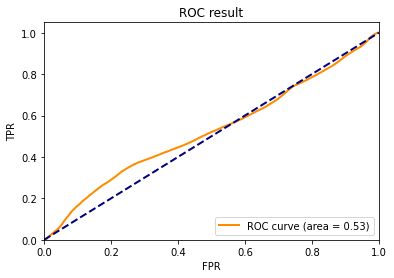

In [128]:
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC result')
plt.legend(loc="lower right")
plt.show()
